In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.data' , names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [3]:
df[df['sepal_length'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
73,NaN,2.2,4.5,1.5,Iris-versicolor
143,NaN,3.0,6.1,2.3,Iris-virginica


In [4]:
df[df['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target


In [5]:
df[df['petal_length'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
20,5.4,3.9,NaN,1.7,Iris-setosa
87,5.5,2.4,NaN,NaN,Iris-versicolor


In [6]:
df[df['petal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
6,5.4,3.9,1.7,NaN,Iris-setosa
27,5.0,3.0,1.6,NaN,Iris-setosa
87,5.5,2.4,NaN,NaN,Iris-versicolor


In [7]:
df[df['target'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
60,6.3,3.3,4.7,1.6,NaN
139,6.2,3.4,5.4,2.0,NaN
156,6.5,3.0,5.2,2.0,NaN


In [8]:
df = df.dropna()
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
target          False
dtype: bool

In [9]:
# df = df.dropna(how = 'all')
# df.isna().any()

In [10]:
# pip install numpy==1.16.5

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_labeled = df.copy()
df_labeled['target'] = le.fit_transform(df_labeled['target'])
df_labeled.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_labeled.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# one_hot_encoder = preprocessing.OneHotEncoder()
# df_one_hot = one_hot_encoder.fit_transform(df['target'].values.reshape(-1,1)).toarray()
# df_one_hot = pd.DataFrame(df_one_hot , columns = ['Iris-setosa' ,'Iris-versicolor' ,'Iris-virginica'])
# df_one_hot.head()

In [14]:
df_labeled.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64

In [15]:
df_labeled.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

In [16]:
df_labeled.iloc[:,[0,1,2,3,4]]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


In [242]:
from sklearn.preprocessing import StandardScaler
df_standard = df_labeled.copy()
scaler = StandardScaler()
cols_to_norm = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
df_standard.iloc[:,[0,1,2,3]] = scaler.fit_transform(df_standard.iloc[:,[0,1,2,3]])
df_standard

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
153,1.038005,-0.124958,0.819624,1.447956,2
154,0.553333,-1.281972,0.705893,0.922064,2
155,0.795669,-0.124958,0.819624,1.053537,2
157,0.432165,0.800654,0.933356,1.447956,2


In [243]:
df_standard.var()

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
target          0.671141
dtype: float64

In [244]:
df_standard.mean()

sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16
target          1.000000e+00
dtype: float64

In [123]:
features = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
x = df_standard.loc[:, features].values
y = df_standard.loc[:,['target']].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents  , columns = ['principal component 1', 'principal component 2'])
df_pca = pd.concat([principalDf, df_standard[['target']]], axis = 1)
df_pca.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0


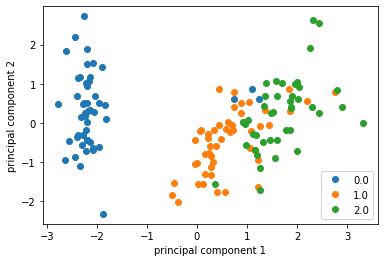

In [124]:
import matplotlib.pyplot as plt
import matplotlib
groups = df_pca.groupby("target")
for name, group in groups:
    plt.plot(group["principal component 1"], group["principal component 2"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

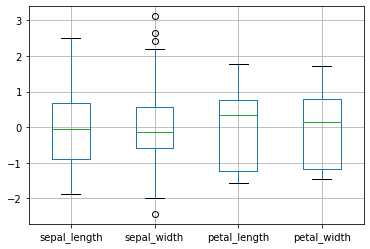

In [225]:
boxplot = df_standard.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])  